## 10 ręki bandyta niestacjonarny dla algorytmu UCB ze zmiennym parametrem C
#### Krzysztof Sawicki

In [4]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

In [5]:
class Arm:

    def __init__(self, meanReturn, varianceReturn):
        self.meanReturn = meanReturn
        self.varianceReturn = varianceReturn
    
    # dla niestacjonarnosci
    def walk(self, meanStep, varianceStep):
        delta_mean = normal(meanStep, varianceStep)
        self.meanReturn += delta_mean
        return delta_mean
    
    #losujemy nagrode z maszyny
    def pull(self):
        award = self.meanReturn
        if self.varianceReturn > 0:
            award = normal(self.meanReturn, self.varianceReturn) 
        return award

In [6]:
class Bandit:

    def __init__(self, numberOfArms, armMean, variance):
        self.numberOfArms = numberOfArms
        self.armMean = armMean
        self.variance = variance
        self.arms = []
        for arm in range(numberOfArms):
            arm = Arm(0, variance)
            self.arms.append(arm)

    def reset(self):
        self.arms = []
        for arm in range(self.numberOfArms):
            arm = Arm(0, self.variance)
            self.arms.append(arm)

    # dla niestacjonarnosci
    def walk(self, meanStep=0, varianceStep=0.01):
        for arm in self.arms:
            arm.walk(meanStep, varianceStep)

    def pull(self, armIndex):
        return self.arms[armIndex].pull()

In [7]:
class UCB:

    def __init__(self, bandit, c, alpha):
        self.bandit = bandit
        self.numberOfArms = len(self.bandit.arms)
        self.numberOfPullsArray = [0] * self.numberOfArms
        self.numberOfPulls = 0
        self.Q = [0.0] * self.numberOfArms
        self.c = c
        self.alpha = alpha

    def learn(self, reward, armIndex):

        self.numberOfPullsArray[armIndex] += 1
        self.numberOfPulls += 1
        if (self.alpha == -1):
            stepSize = 1 / self.numberOfPullsArray[armIndex]
        else:
            stepSize = self.alpha
        self.Q[armIndex] += stepSize * (reward - self.Q[armIndex])

    def policy(self):

        A = []
        for i in range(self.numberOfArms):
            if self.numberOfPullsArray[i] > 0:
            #obliczamy górny przedział ufnośći
                val = self.Q[i] + self.c * np.sqrt((np.log(self.numberOfPulls) / self.numberOfPullsArray[i]))
            #jesli nie odwiedzilismy danej maszyny to ją odwiedzamy
            else:
                val = 10000
            A.append(val)
        armIndex = argmax(A)
        return armIndex

    def reset(self):
        self.Q = [0.0] * self.numberOfArms
        self.numberOfPullsArray = [0] * self.numberOfArms
        self.numberOfPulls = 0

In [8]:
def testUCB(runs, pulls, c, alpha):

    bandit = Bandit(10, 0, 1)
    ucb = UCB(bandit, c, alpha)
    reward_array = [0.0] * pulls

    for run in range(runs):
        ucb.reset()
        if run % 100 == 0:
            print("Run number " + str(run) + f" for c: {ucb.c}")

        for pull in range(pulls):

            arm = ucb.policy()
            reward = bandit.pull(arm)
            ucb.learn(reward, arm)
            step_size = 1 / (run + 1)
            reward_array[pull] += step_size * (reward - reward_array[pull])
            bandit.walk()
                
        bandit.reset()

    return reward_array

In [9]:
c_values = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]

In [10]:
rewards_list = []
for c in c_values:
    rewards = testUCB(runs = 2000,pulls = 1000, c=c, alpha=0.1)
    mean_reward = mean(rewards)
    print(mean_reward)
    rewards_list.append(mean_reward)

Run number 0 for c: 0.0625
Run number 100 for c: 0.0625
Run number 200 for c: 0.0625
Run number 300 for c: 0.0625
Run number 400 for c: 0.0625
Run number 500 for c: 0.0625
Run number 600 for c: 0.0625
Run number 700 for c: 0.0625
Run number 800 for c: 0.0625
Run number 900 for c: 0.0625
Run number 1000 for c: 0.0625
Run number 1100 for c: 0.0625
Run number 1200 for c: 0.0625
Run number 1300 for c: 0.0625
Run number 1400 for c: 0.0625
Run number 1500 for c: 0.0625
Run number 1600 for c: 0.0625
Run number 1700 for c: 0.0625
Run number 1800 for c: 0.0625
Run number 1900 for c: 0.0625
0.1958142826082103
Run number 0 for c: 0.125
Run number 100 for c: 0.125
Run number 200 for c: 0.125
Run number 300 for c: 0.125
Run number 400 for c: 0.125
Run number 500 for c: 0.125
Run number 600 for c: 0.125
Run number 700 for c: 0.125
Run number 800 for c: 0.125
Run number 900 for c: 0.125
Run number 1000 for c: 0.125
Run number 1100 for c: 0.125
Run number 1200 for c: 0.125
Run number 1300 for c: 0.125

In [11]:
rewards_list_1k = rewards_list

In [12]:
rewards_list_1k

[0.1958142826082103,
 0.19453215413776725,
 0.19086327894065303,
 0.1862130402869157,
 0.16710360649789816,
 0.1351903159306185,
 0.09385162201620435]

In [ ]:
rewards_list = []
for c in c_values:
    rewards = testUCB(runs = 2000,pulls = 20000, c=c, alpha=0.1)
    mean_reward = mean(rewards)
    print(mean_reward)
    rewards_list.append(mean_reward)

In [69]:
rewards_list_20k = rewards_list

In [70]:
rewards_list_20k

[1.4285447958002098,
 1.452990513414917,
 1.476953948794343,
 1.5172621805214488,
 1.5340033756105804,
 1.6013427561961213,
 1.6479976595703523]

### Wykres dla 1000 pulli, run = 1k

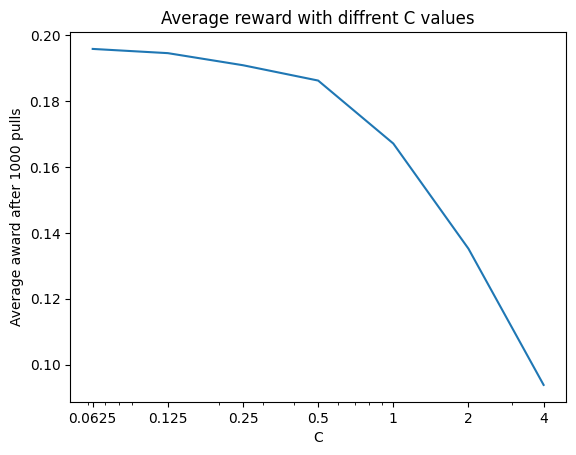

In [13]:
plt.figure()
plt.semilogx(c_values, rewards_list_1k)
plt.title('Average reward with diffrent C values')
plt.xlabel('C')
plt.xticks(c_values,c_values)
plt.ylabel('Average award after 1000 pulls')
plt.show()

### Wykres dla 20000 pulli, run = 2k

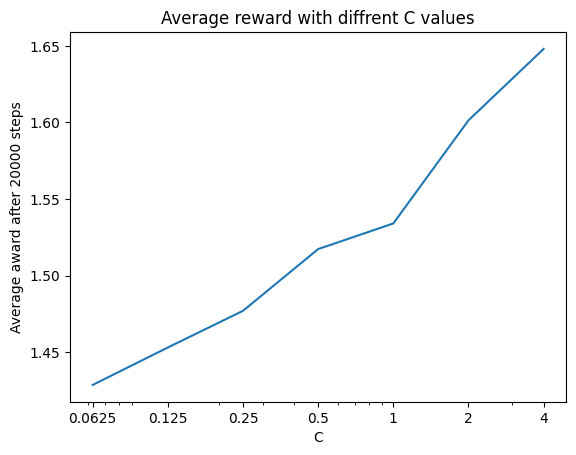

In [71]:
plt.figure()
plt.semilogx(c_values, rewards_list_20k)
plt.title('Average reward with diffrent C values on 20000 pulls')
plt.xlabel('C')
plt.xticks(c_values,c_values)
plt.ylabel('Average award over last 10000 pulls')
plt.show()